# Invert using invert Class

In [1]:
import matplotlib.pyplot as plt
from src.invert_c_theta import Invert
import pandas as pd
import firedrake 
import os

Reading outline from icepack database


2024-05-18 17:49:28.463266: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-18 17:49:28.463742: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 17:49:28.485831: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 17:49:28.567907: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 17:49:29.196000: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

## Constant C0 = 1e-3

### resolution lcar = 5e3

In [2]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_simultaneous = 0.1, read_mesh = False, drichlet_ids = [2,3,4], lcar = 5e3)

Reading outline from icepack database


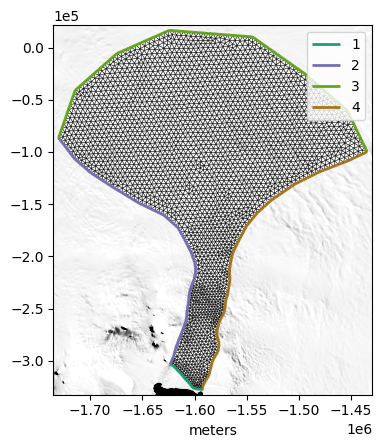

In [3]:
invert_pig.plot_mesh()

#### Simultaneous theta C optimization

In [4]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True)

Reading velocity from specified file
C0 is constant: 0.001


In [5]:
invert_pig.invert_C_theta_simultaneously(max_iterations=200, regularization_grad_fcn= True)


Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.590920e+08   2.937450e+03                  5.509844e+04   
  1     5.743081e+07   1.085140e+03   5.509844e+04   1.377461e+05   3         2         0         1         3         
  2     8.180624e+06   1.566247e+02   1.377461e+05   1.377461e+05   4         3         0         2         2         
  3     8.180624e+06   1.566247e+02   1.377461e+05   8.609131e+03   5         3         2         2         2         
  4     6.944497e+06   1.314865e+02   8.609131e+03   2.152283e+04   6         4         0         1         3         
  5     4.656211e+06   8.514388e+01   2.152283e+04   5.380707e+04   7         5         0         1         3         
  6     1.776071e+06   3.245882e+01   5.380707e+04   1.345177e+05   8         6         0         2         3         
  7     1.776071e+06   3.245882e+01   1.345177e+05   8.407354e+0

In [6]:
u_optimized = invert_pig.simulation()

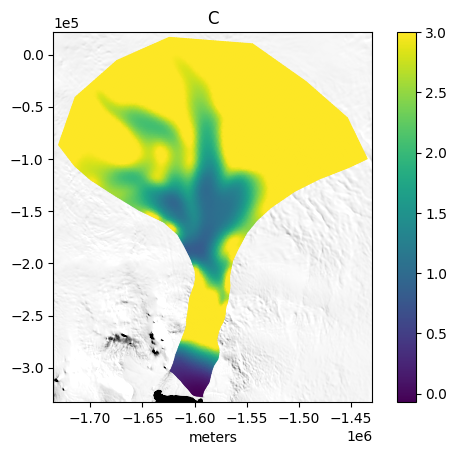

In [7]:
invert_pig.plot_C(vmin = None, vmax = 3)

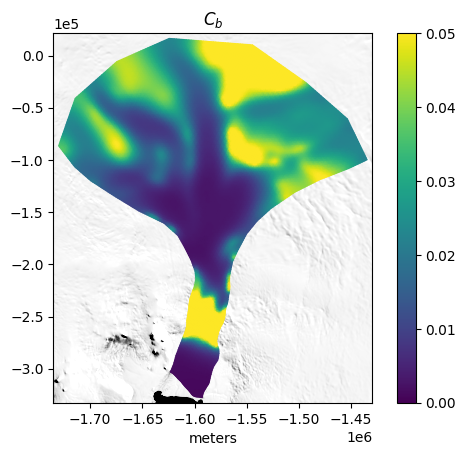

In [8]:
invert_pig.plot_C_total(vmin =0, vmax = 0.05)

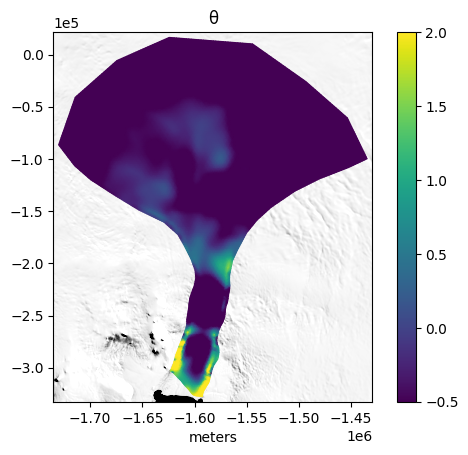

In [9]:
invert_pig.plot_theta(vmin = -0.5, vmax = 2)

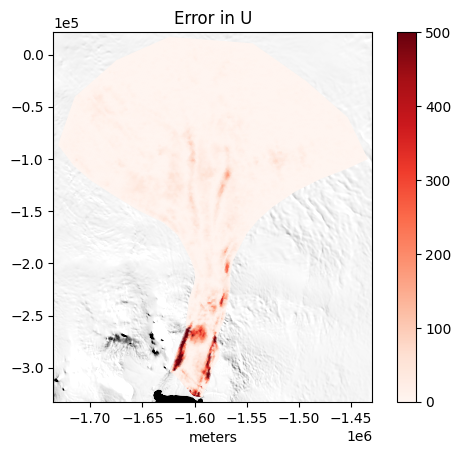

In [10]:
invert_pig.plot_u_error(u_optimized, vmax = 500)

In [11]:
# 426.86530573542706
# 411.3643399240878
# 504.92829587924814 : 150 iterations
# 379.3030080207641 : 300 iterations 
firedrake.assemble(invert_pig.loss_functional(u_optimized))

44.10451469069513

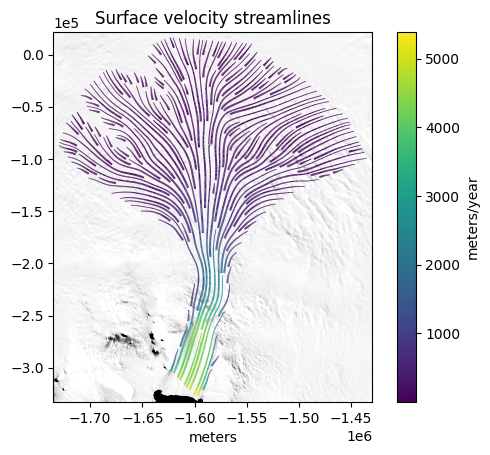

In [12]:
invert_pig.plot_streamline_u(u_optimized)

### resolution lcar = 3.5e3

In [13]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_simultaneous = 0.1, read_mesh = False, drichlet_ids = [2,3,4], lcar = 3.5e3)

Reading outline from icepack database


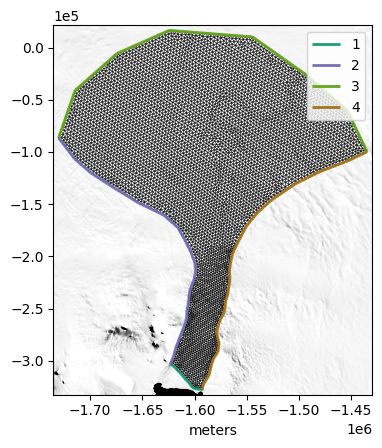

In [14]:
invert_pig.plot_mesh()

In [15]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True)

Reading velocity from specified file
C0 is constant: 0.001


In [16]:
invert_pig.invert_C_theta_simultaneously(max_iterations=200, regularization_grad_fcn= True)


Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.624205e+08   3.000142e+03                  5.517929e+04   
  1     5.848681e+07   1.105606e+03   5.517929e+04   1.379482e+05   3         2         0         1         3         
  2     8.277240e+06   1.584574e+02   1.379482e+05   1.379482e+05   4         3         0         2         2         
  3     8.277240e+06   1.584574e+02   1.379482e+05   8.621764e+03   5         3         2         2         2         
  4     7.024014e+06   1.331771e+02   8.621764e+03   2.155441e+04   6         4         0         1         3         
  5     4.713020e+06   8.586570e+01   2.155441e+04   5.388603e+04   7         5         0         1         3         
  6     1.812763e+06   3.300254e+01   5.388603e+04   1.347151e+05   8         6         0         1         3         
  7     1.812763e+06   3.300254e+01   1.347151e+05   8.419692e+0

In [17]:
u_optimized = invert_pig.simulation()

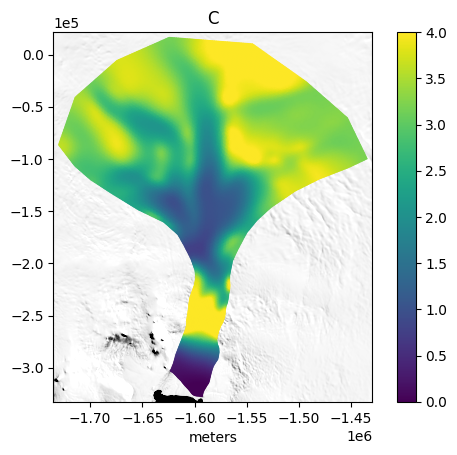

In [18]:
invert_pig.plot_C(vmin = 0, vmax = 4)

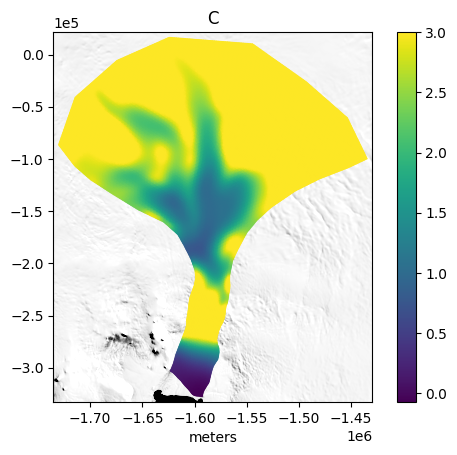

In [19]:
invert_pig.plot_C(vmin = None, vmax = 3)

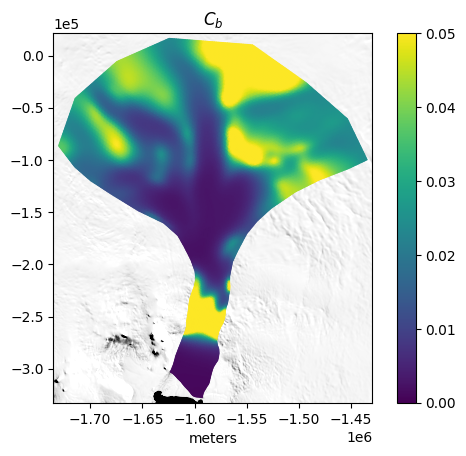

In [20]:
invert_pig.plot_C_total(vmin =0, vmax = 0.05)

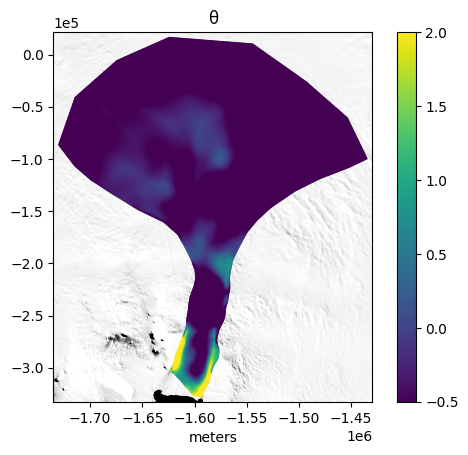

In [21]:
invert_pig.plot_theta(vmin = -0.5, vmax = 2)

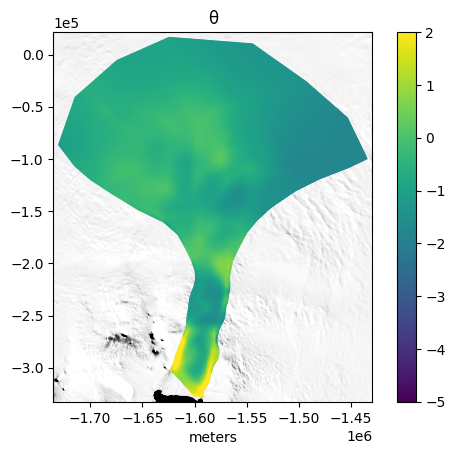

In [22]:
invert_pig.plot_theta(vmin = -5, vmax = 2)

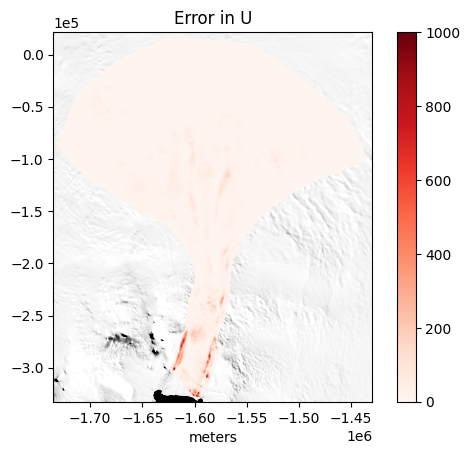

In [23]:
invert_pig.plot_u_error(u_optimized, vmax = 1000)

In [24]:
# 367.3261027262398 : 150 iterations
# 367.44506173038315 : 300 iterations
firedrake.assemble(invert_pig.loss_functional(u_optimized))

28.676927335073028

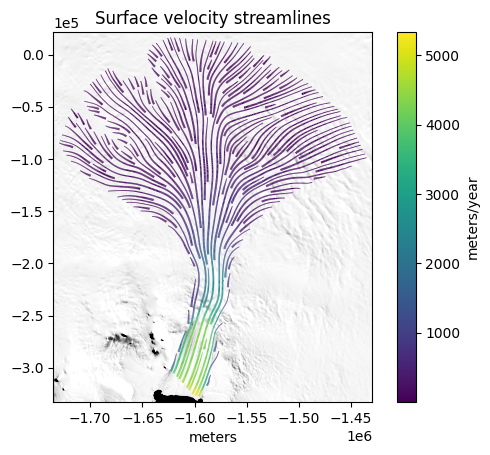

In [26]:
invert_pig.plot_streamline_u(u_optimized)

Save variables

In [ ]:
# Save to Checkpoint File
mesh = invert_pig.get_mesh()
theta = invert_pig.get_theta()
C = invert_pig.get_C()
#checkpoint_file_path = os.path.join(folder_path, 'new_reg_variables_c5_t5_simultaneous.h5')
checkpoint_file_path = os.path.join(folder_path, 'regularized_const_C_simultaneous_01.h5')
with firedrake.CheckpointFile(checkpoint_file_path, 'w') as afile:
    if afile is not None:
        afile.save_mesh(mesh)  # optional
        afile.save_function(u_optimized, name='u_optimized')
        afile.save_function(theta, name='theta')
        afile.save_function(C, name='C')
    else:
        print("Failed to create checkpoint file.")

In [28]:
df = invert_pig.get_dataframe(u_optimized)
df.to_csv('regularized_const_C_simultaneous_r01.csv')

### resolution lcar = 2.5e3

In [2]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_simultaneous = 0.1, read_mesh = False, drichlet_ids = [2,3,4], lcar = 2.5e3)

Reading outline from icepack database


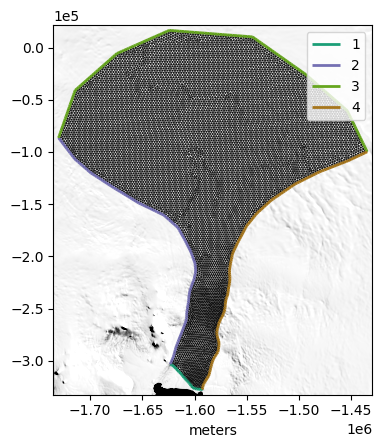

In [3]:
invert_pig.plot_mesh()

In [4]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True)

Reading velocity from specified file
C0 is constant: 0.001


In [5]:
invert_pig.invert_C_theta_simultaneously(max_iterations=200, regularization_grad_fcn= True)


Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.647698e+08   3.042904e+03                  5.523344e+04   
  1     5.926909e+07   1.120463e+03   5.523344e+04   1.380836e+05   3         2         0         1         3         
  2     8.376208e+06   1.603502e+02   1.380836e+05   1.380836e+05   4         3         0         2         2         
  3     8.376208e+06   1.603502e+02   1.380836e+05   8.630226e+03   5         3         2         2         2         
  4     7.106671e+06   1.347908e+02   8.630226e+03   2.157556e+04   6         4         0         1         3         
  5     4.768286e+06   8.688283e+01   2.157556e+04   5.393891e+04   7         5         0         1         3         
  6     1.832643e+06   3.339179e+01   5.393891e+04   1.348473e+05   8         6         0         1         3         
  7     1.832643e+06   3.339179e+01   1.348473e+05   8.427955e+0

In [6]:
u_optimized = invert_pig.simulation()

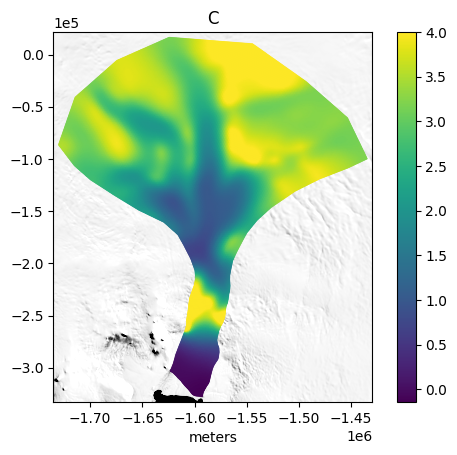

In [7]:
invert_pig.plot_C(vmin = None, vmax = 4)

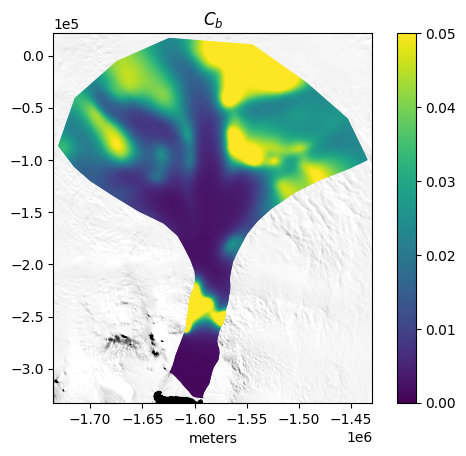

In [8]:
invert_pig.plot_C_total(vmin =0, vmax = 0.05)

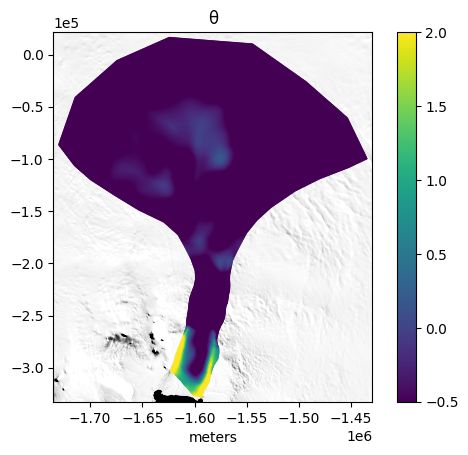

In [9]:
invert_pig.plot_theta(vmin = -0.5, vmax = 2)

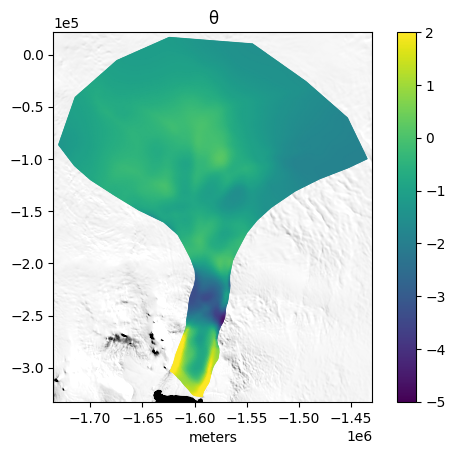

In [16]:
invert_pig.plot_theta(vmin = -5, vmax = 2)

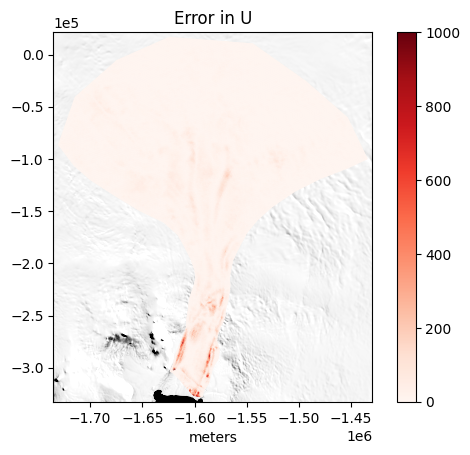

In [15]:
invert_pig.plot_u_error(u_optimized, vmax = 1000)

In [11]:
# 317.4592973228489 : 300 iterations
firedrake.assemble(invert_pig.loss_functional(u_optimized))

26.42683912640167

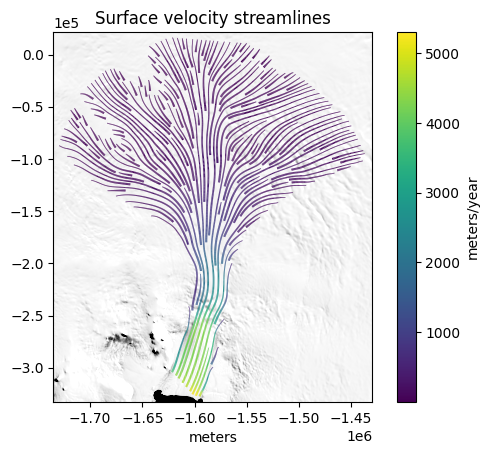

In [12]:
invert_pig.plot_streamline_u(u_optimized)

In [ ]:
# Save to Checkpoint File
mesh = invert_pig.get_mesh()
theta = invert_pig.get_theta()
C = invert_pig.get_C()
#checkpoint_file_path = os.path.join(folder_path, 'new_reg_variables_c5_t5_simultaneous.h5')
checkpoint_file_path = os.path.join(folder_path, 'regularized_const_C_simultaneous_finemesh_r01.h5')
with firedrake.CheckpointFile(checkpoint_file_path, 'w') as afile:
    if afile is not None:
        afile.save_mesh(mesh)  # optional
        afile.save_function(u_optimized, name='u_optimized')
        afile.save_function(theta, name='theta')
        afile.save_function(C, name='C')
    else:
        print("Failed to create checkpoint file.")

In [17]:
df = invert_pig.get_dataframe(u_optimized)
df.to_csv('regularized_const_C_simultaneous_finemesh_r01.csv')